In [1]:
pip install flask beautifulsoup4 requests pandas geopy


  Obtaining dependency information for geopy from https://files.pythonhosted.org/packages/e5/15/cf2a69ade4b194aa524ac75112d5caac37414b20a3a03e6865dfe0bd1539/geopy-2.4.1-py3-none-any.whl.metadata
  Obtaining dependency information for geographiclib<3,>=1.52 from https://files.pythonhosted.org/packages/9f/5a/a26132406f1f40cf51ea349a5f11b0a46cec02a2031ff82e391c2537247a/geographiclib-2.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/125.4 kB ? eta -:--:--
   ---------------------------------------- 125.4/125.4 kB 3.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/40.3 kB ? eta -:--:--
   ---------------------------------------- 40.3/40.3 kB ? eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Empty DataFrame
Columns: []
Index: []


In [3]:
df


""


In [6]:
import yfinance as yf
import pandas as pd
import numpy as np
import datetime

# Konfiguration
aktier = ['AAPL', 'MSFT', 'GOOG']  # Exempelaktier, lägg till fler efter behov
startdatum = '2020-01-01'
slutdatum = datetime.datetime.now().strftime('%Y-%m-%d')

# Hämta aktiedata
data = yf.download(aktier, start=startdatum, end=slutdatum)['Adj Close']

# Beräkna momentum och MA100
momentum_scores = pd.DataFrame(index=data.index)
for aktie in aktier:
    # Beräkna prisförändringar
    momentum_scores[aktie + '_1M'] = data[aktie].pct_change(30) * 0.40
    momentum_scores[aktie + '_3M'] = data[aktie].pct_change(90) * 0.25
    momentum_scores[aktie + '_6M'] = data[aktie].pct_change(180) * 0.20
    momentum_scores[aktie + '_12M'] = data[aktie].pct_change(365) * 0.15
    
    # Sammanlagd momentumskår
    momentum_scores[aktie + '_Total'] = momentum_scores[[aktie + '_1M', aktie + '_3M', aktie + '_6M', aktie + '_12M']].sum(axis=1)

    # Beräkna MA100 och filtrera
    data[aktie + '_MA100'] = data[aktie].rolling(window=100).mean()
    momentum_scores[aktie + '_Eligible'] = np.where(data[aktie] > data[aktie + '_MA100'], 1, 0)

# Visa de senaste resultaten
momentum_scores.tail()


[*********************100%%**********************]  3 of 3 completed


,AAPL_1M,AAPL_3M,AAPL_6M,AAPL_12M,AAPL_Total,AAPL_Eligible,MSFT_1M,MSFT_3M,MSFT_6M,MSFT_12M,MSFT_Total,MSFT_Eligible,GOOG_1M,GOOG_3M,GOOG_6M,GOOG_12M,GOOG_Total,GOOG_Eligible
Date,,,,,,,,,,,,,,,,,,
2024-03-20,-0.021980,-0.005135,-0.013597,0.034627,-0.006084,0,0.020248,0.043833,0.053135,0.109433,0.226650,1,0.011746,0.030804,0.048308,0.069644,0.160502,1
2024-03-21,-0.037635,-0.014521,-0.020157,0.028265,-0.044049,0,0.015567,0.048759,0.055478,0.114517,0.234321,1,0.005618,0.032368,0.042583,0.068222,0.148791,1
2024-03-22,-0.033603,-0.018643,-0.019655,0.036043,-0.035857,0,0.014897,0.041074,0.052771,0.128280,0.237022,1,0.012362,0.033026,0.051005,0.078638,0.175032,1
2024-03-25,-0.038125,-0.018577,-0.020092,0.034065,-0.042729,0,0.002941,0.039423,0.052299,0.130438,0.225100,1,0.002476,0.032756,0.051623,0.079688,0.166543,1
2024-03-26,-0.037275,-0.023359,-0.019331,0.034731,-0.045233,0,0.006906,0.035796,0.055663,0.134399,0.232765,1,0.007988,0.030034,0.059605,0.082075,0.179702,1


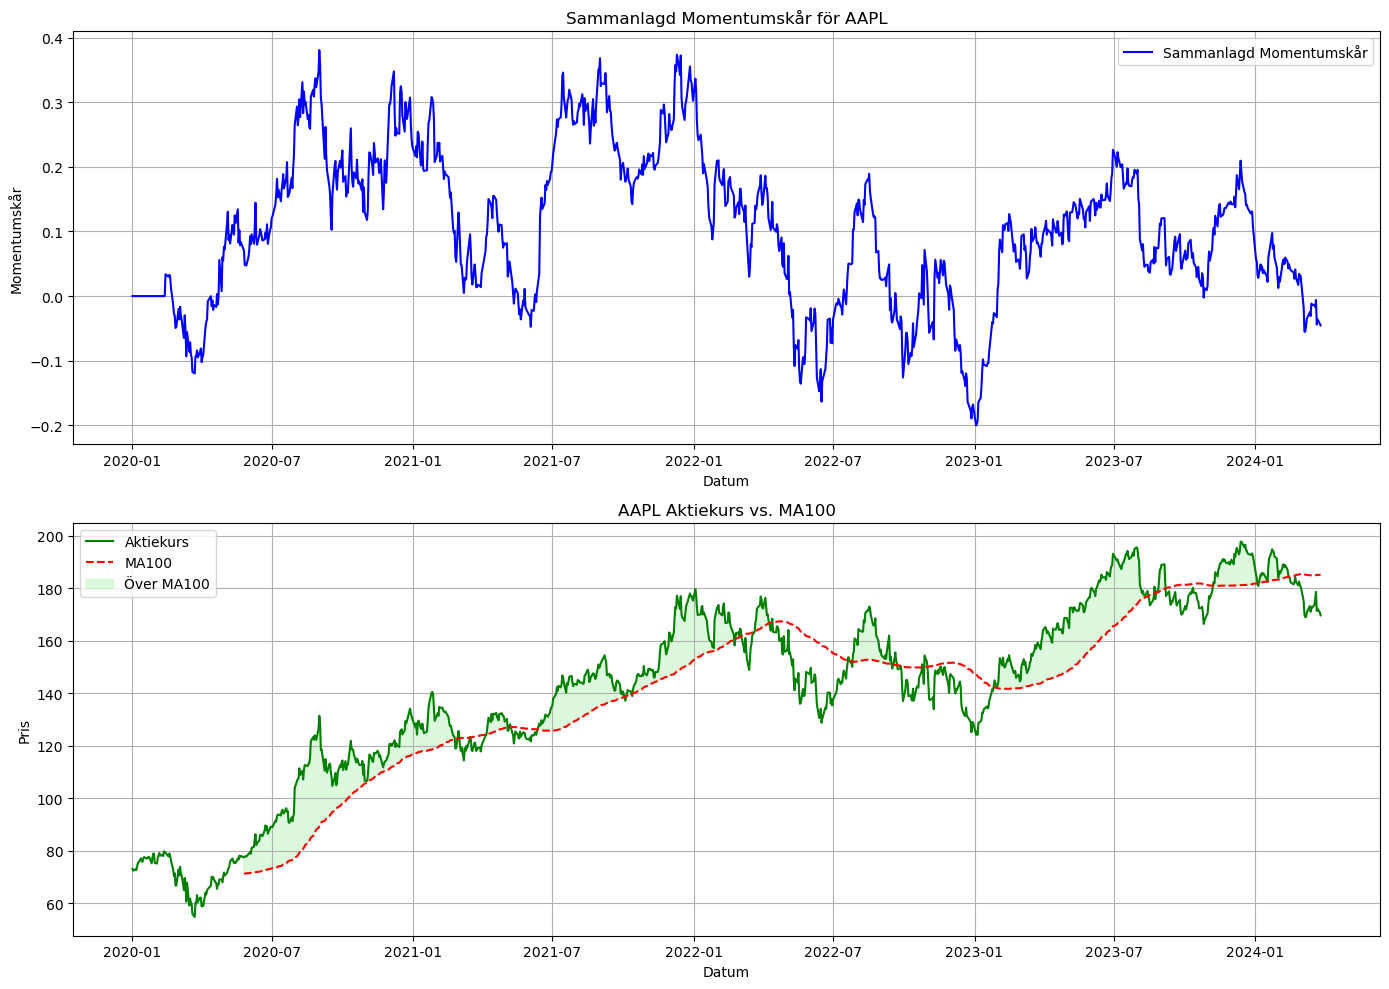

In [7]:
import matplotlib.pyplot as plt

# Välj en aktie för visualisering
aktie = 'AAPL'

# Skapa en figur och axel för diagrammen
fig, ax = plt.subplots(2, 1, figsize=(14, 10))

# Plott 1: Sammanlagd momentumskår över tid
ax[0].plot(momentum_scores.index, momentum_scores[aktie + '_Total'], label='Sammanlagd Momentumskår', color='blue')
ax[0].set_title(f'Sammanlagd Momentumskår för {aktie}')
ax[0].set_xlabel('Datum')
ax[0].set_ylabel('Momentumskår')
ax[0].legend()
ax[0].grid(True)

# Plott 2: Aktiekurs vs. MA100
ax[1].plot(data.index, data[aktie], label='Aktiekurs', color='green')
ax[1].plot(data.index, data[aktie + '_MA100'], label='MA100', color='red', linestyle='--')
ax[1].fill_between(data.index, data[aktie], data[aktie + '_MA100'], where=data[aktie] > data[aktie + '_MA100'], color='lightgreen', alpha=0.3, label='Över MA100')
ax[1].set_title(f'{aktie} Aktiekurs vs. MA100')
ax[1].set_xlabel('Datum')
ax[1].set_ylabel('Pris')
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()


[*********************100%%**********************]  3 of 3 completed


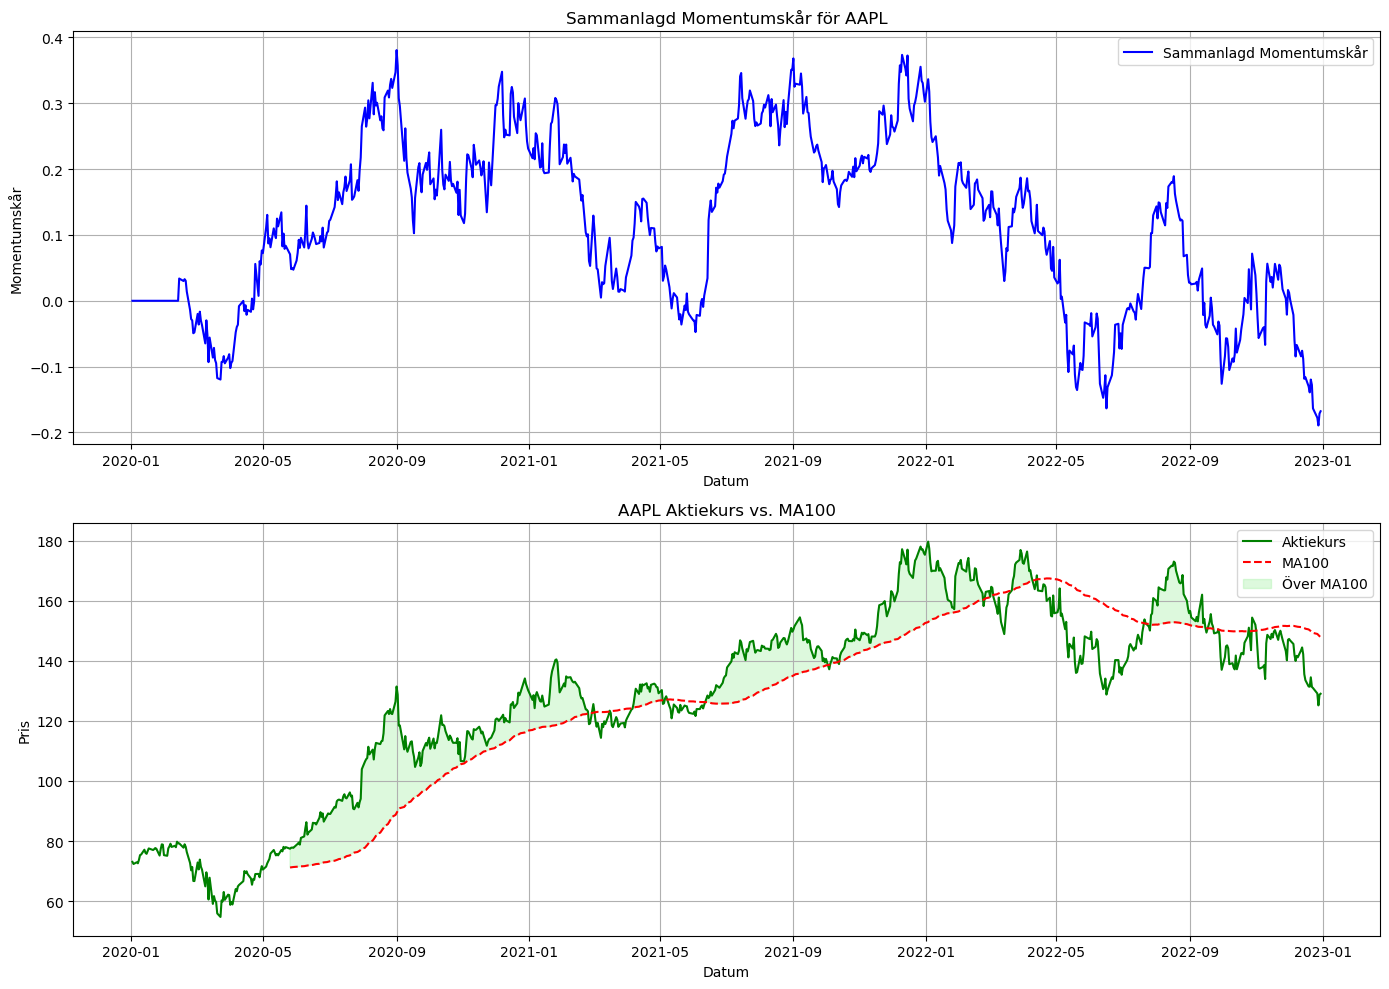

In [8]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Konfiguration
aktier = ['AAPL', 'MSFT', 'GOOG']  # Exempelaktier, lägg till fler efter behov
startdatum = '2020-01-01'
slutdatum = '2023-01-01'

# Hämta aktiedata
data = yf.download(aktier, start=startdatum, end=slutdatum)['Adj Close']

# Beräkna momentum och MA100
momentum_scores = pd.DataFrame(index=data.index)
for aktie in aktier:
    # Beräkna prisförändringar
    momentum_scores[aktie + '_1M'] = data[aktie].pct_change(30) * 0.40
    momentum_scores[aktie + '_3M'] = data[aktie].pct_change(90) * 0.25
    momentum_scores[aktie + '_6M'] = data[aktie].pct_change(180) * 0.20
    momentum_scores[aktie + '_12M'] = data[aktie].pct_change(365) * 0.15
    
    # Sammanlagd momentumskår
    momentum_scores[aktie + '_Total'] = momentum_scores[[aktie + '_1M', aktie + '_3M', aktie + '_6M', aktie + '_12M']].sum(axis=1)

    # Beräkna MA100 och filtrera
    data[aktie + '_MA100'] = data[aktie].rolling(window=100).mean()
    momentum_scores[aktie + '_Eligible'] = np.where(data[aktie] > data[aktie + '_MA100'], 1, 0)

# Visualisera momentumskår och MA100 för en vald aktie
aktie = 'AAPL'

# Skapa figur och axlar för diagrammen
fig, ax = plt.subplots(2, 1, figsize=(14, 10))

# Plott 1: Sammanlagd momentumskår över tid
ax[0].plot(momentum_scores.index, momentum_scores[aktie + '_Total'], label='Sammanlagd Momentumskår', color='blue')
ax[0].set_title(f'Sammanlagd Momentumskår för {aktie}')
ax[0].set_xlabel('Datum')
ax[0].set_ylabel('Momentumskår')
ax[0].legend()
ax[0].grid(True)

# Plott 2: Aktiekurs vs. MA100
ax[1].plot(data.index, data[aktie], label='Aktiekurs', color='green')
ax[1].plot(data.index, data[aktie + '_MA100'], label='MA100', color='red', linestyle='--')
ax[1].fill_between(data.index, data[aktie], data[aktie + '_MA100'], where=data[aktie] > data[aktie + '_MA100'], color='lightgreen', alpha=0.3, label='Över MA100')
ax[1].set_title(f'{aktie} Aktiekurs vs. MA100')
ax[1].set_xlabel('Datum')
ax[1].set_ylabel('Pris')
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()


[*********************100%%**********************]  3 of 3 completed


C:\Users\saak0033\AppData\Local\Temp\ipykernel_29824\1100872566.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  momentum_scores_filtered['Total_Score'] = momentum_scores_filtered[[aktie for aktie in aktier]].sum(axis=1)


KeyError: Timestamp('2021-09-01 00:00:00')

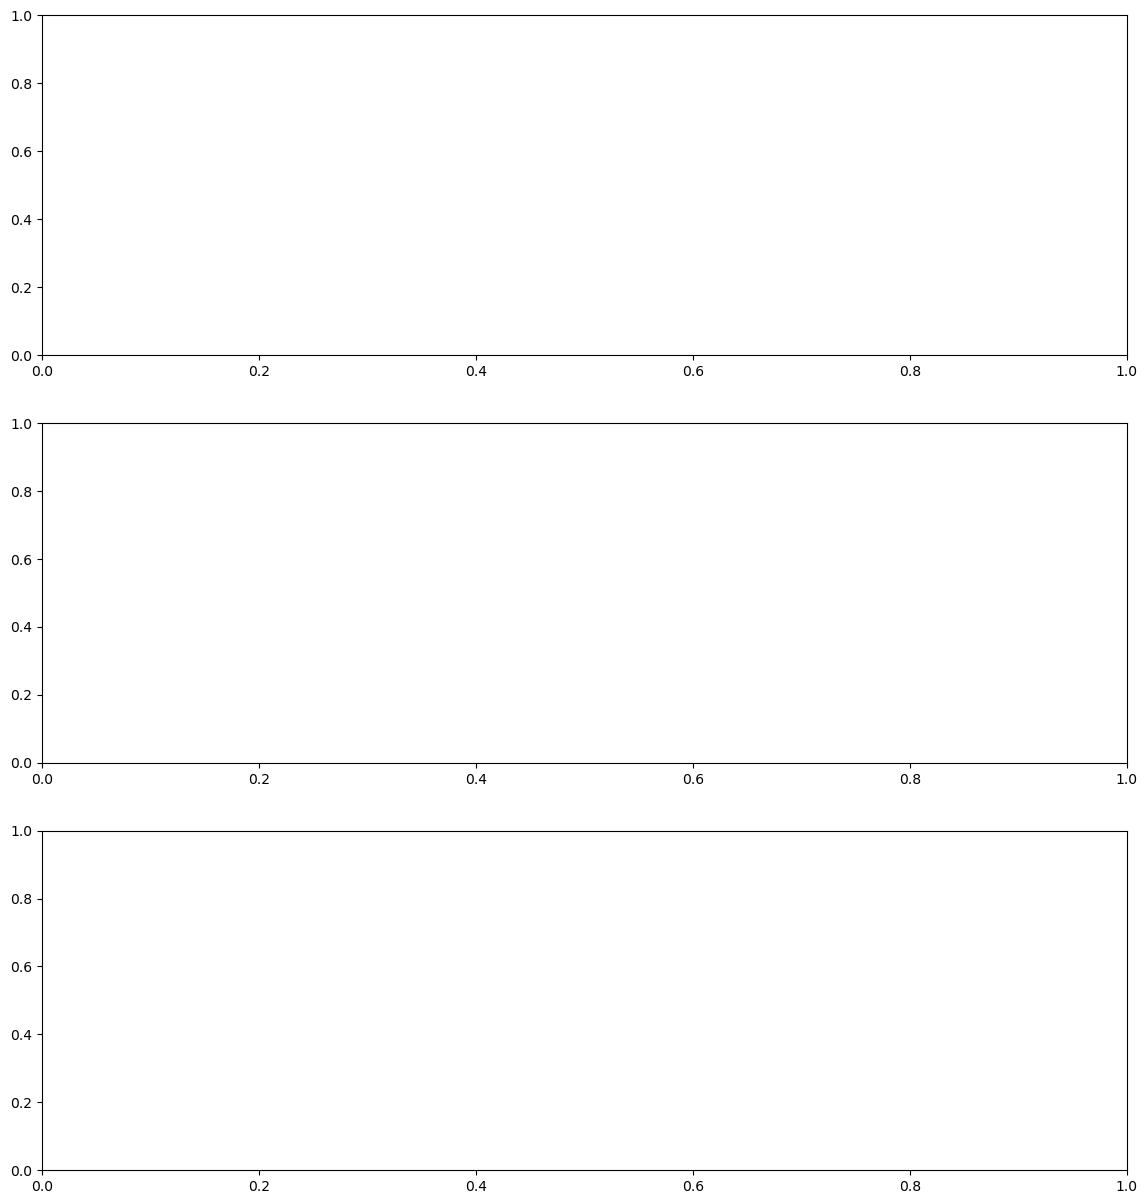

In [11]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

# Konfiguration
aktier = ['AAPL', 'MSFT', 'GOOG']  # Exempelaktier, lägg till fler efter behov
startdatum = '2020-01-01'
slutdatum = datetime.datetime.now().strftime('%Y-%m-%d')

# Hämta aktiedata
data = yf.download(aktier, start=startdatum, end=slutdatum)['Adj Close']

# Beräkna momentum och MA100
momentum_scores = pd.DataFrame(index=data.index)
for aktie in aktier:
    # Beräkna prisförändringar
    momentum_scores[aktie] = (data[aktie].pct_change(30) * 0.40 +
                              data[aktie].pct_change(90) * 0.25 +
                              data[aktie].pct_change(180) * 0.20 +
                              data[aktie].pct_change(365) * 0.15)

    # Beräkna MA100
    data[aktie + '_MA100'] = data[aktie].rolling(window=100).mean()
    
    


# Filtrera baserat på MA100 och beräkna ranking
# Korrigering för filtrering baserat på MA100
for aktie in aktier:
    momentum_scores[aktie + '_Eligible'] = data[aktie] > data[aktie + '_MA100']

# Endast behålla de rader där aktien är 'Eligible' för alla aktier
eligible_rows = np.all(momentum_scores[[aktie + '_Eligible' for aktie in aktier]], axis=1)
momentum_scores_filtered = momentum_scores[eligible_rows]

# Beräkna ranking baserat på sammanlagda momentumskåren
momentum_scores_filtered['Total_Score'] = momentum_scores_filtered[[aktie for aktie in aktier]].sum(axis=1)
ranked_aktier = momentum_scores_filtered['Total_Score'].sort_values(ascending=False)

# Fortsätt med visualiseringen som tidigare


# Välj topprankade aktier för visualisering
top_aktier = ranked_aktier.head(3).index.tolist()

# Visualisering
# Använd .copy() för att undvika SettingWithCopyWarning
momentum_scores_filtered = momentum_scores[eligible_rows].copy()

# Lägg till Total_Score i momentum_scores_filtered
momentum_scores_filtered['Total_Score'] = momentum_scores_filtered[[aktie for aktie in aktier]].sum(axis=1)

# Synkronisera index för data och momentum_scores för att undvika KeyError
momentum_scores_filtered = momentum_scores_filtered.reindex(data.index)

# Visualisering
fig, ax = plt.subplots(len(top_aktier), 1, figsize=(14, 5 * len(top_aktier)))

for i, aktie in enumerate(top_aktier):
    if len(top_aktier) > 1:
        axis = ax[i]
    else:
        axis = ax
    axis.plot(momentum_scores_filtered.index, momentum_scores_filtered[aktie], label=f'Momentumskår för {aktie}', color='blue')
    axis.plot(data.index, data[aktie + '_MA100'], label=f'MA100 för {aktie}', color='red', linestyle='--')
    axis.fill_between(data.index, data[aktie], data[aktie + '_MA100'], where=data[aktie] > data[aktie + '_MA100'], color='lightgreen', alpha=0.3, label='Över MA100')
    axis.set_title(f'{aktie} - Momentumskår och MA100')
    axis.set_xlabel('Datum')
    axis.set_ylabel('Värde')
    axis.legend()
    axis.grid(True)

plt.tight_layout()
plt.show()



[*********************100%%**********************]  3 of 3 completed


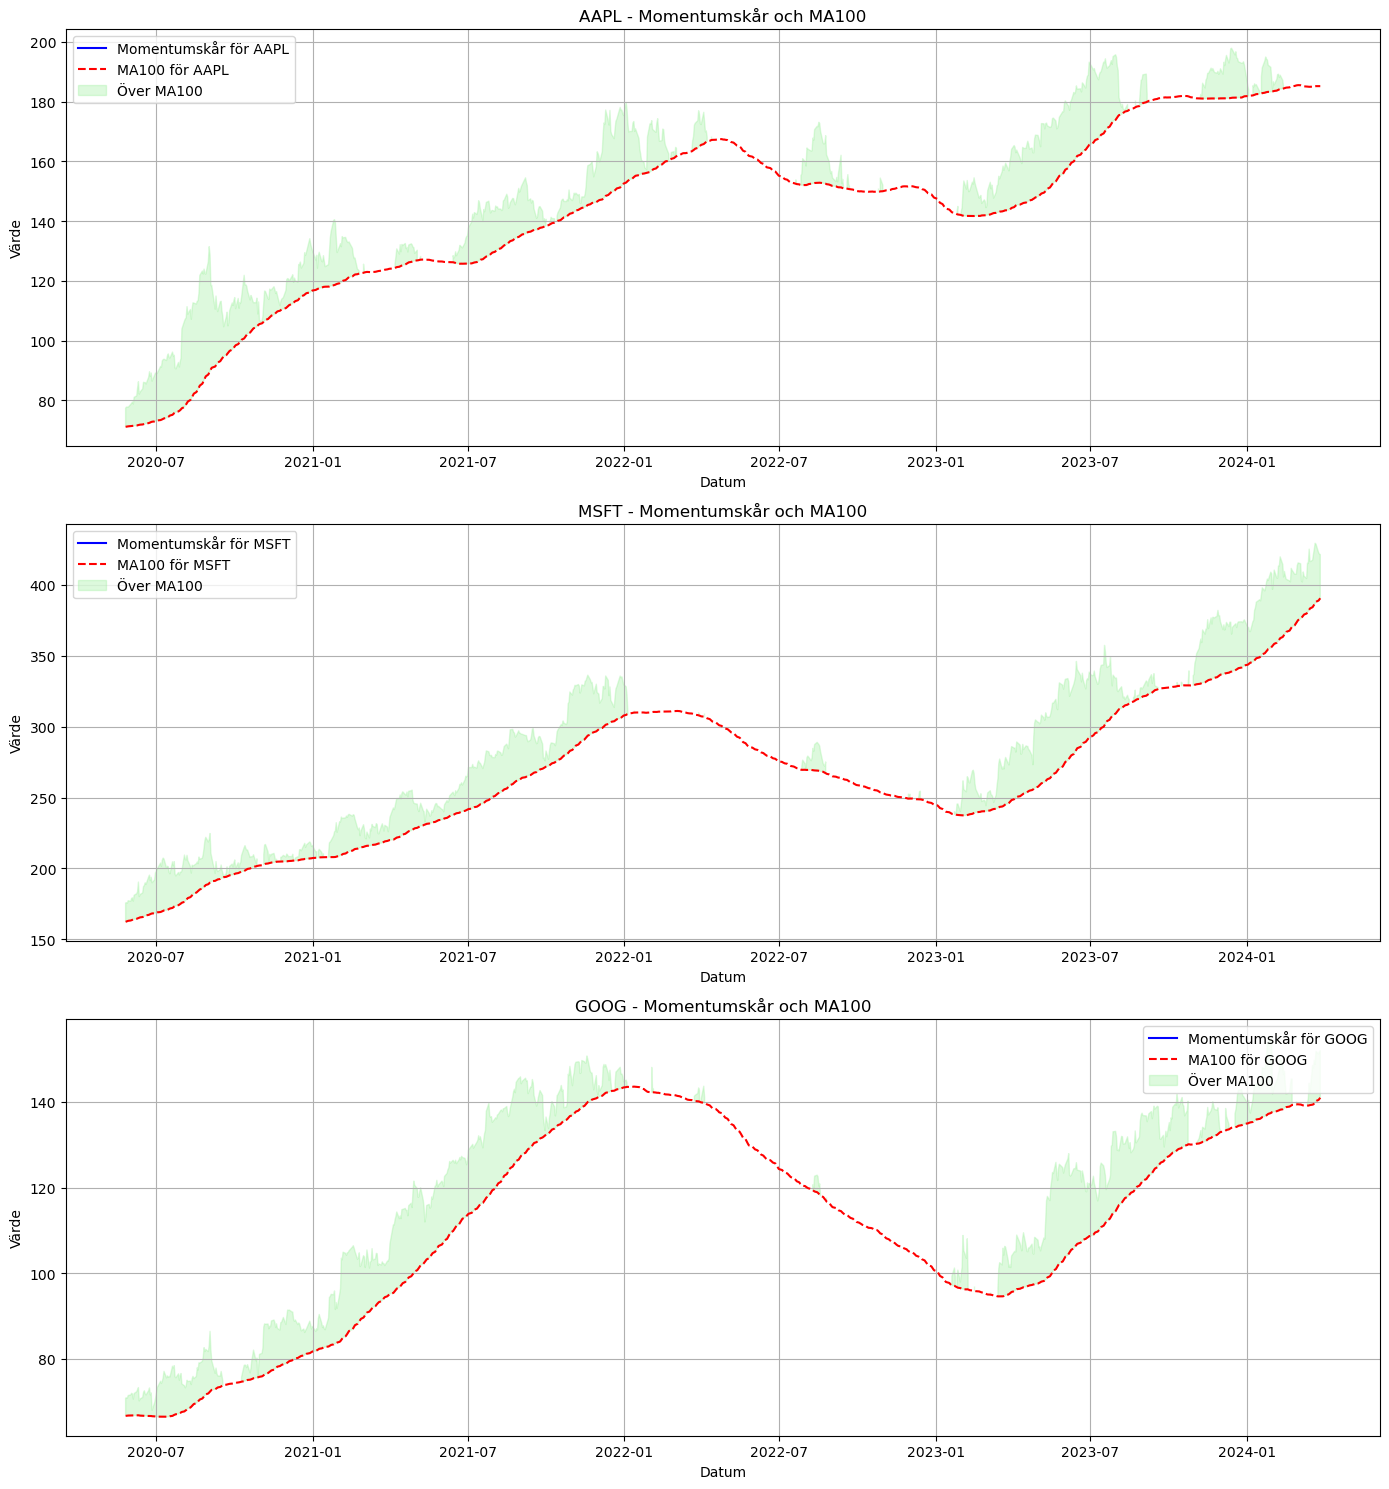

In [12]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

# Konfiguration
aktier = ['AAPL', 'MSFT', 'GOOG']  # Exempelaktier, lägg till fler efter behov
startdatum = '2020-01-01'
slutdatum = datetime.datetime.now().strftime('%Y-%m-%d')

# Hämta aktiedata
data = yf.download(aktier, start=startdatum, end=slutdatum)['Adj Close']

# Beräkna momentum och MA100
momentum_scores = pd.DataFrame(index=data.index)
for aktie in aktier:
    momentum_scores[aktie] = (data[aktie].pct_change(30) * 0.40 +
                              data[aktie].pct_change(90) * 0.25 +
                              data[aktie].pct_change(180) * 0.20 +
                              data[aktie].pct_change(365) * 0.15)
    data[aktie + '_MA100'] = data[aktie].rolling(window=100).mean()

# Använd .copy() för att undvika SettingWithCopyWarning
momentum_scores_filtered = momentum_scores[data.gt(data.shift(1).add_suffix('_MA100'))].copy()

# Lägg till Total_Score i momentum_scores_filtered
momentum_scores_filtered['Total_Score'] = momentum_scores_filtered.sum(axis=1)

# Visualisering
fig, ax = plt.subplots(len(aktier), 1, figsize=(14, 5 * len(aktier)))

for i, aktie in enumerate(aktier):
    if len(aktier) > 1:
        axis = ax[i]
    else:
        axis = ax
    axis.plot(momentum_scores_filtered.index, momentum_scores_filtered[aktie], label=f'Momentumskår för {aktie}', color='blue')
    axis.plot(data.loc[momentum_scores_filtered.index][aktie + '_MA100'], label=f'MA100 för {aktie}', color='red', linestyle='--')
    axis.fill_between(data.loc[momentum_scores_filtered.index].index, data.loc[momentum_scores_filtered.index][aktie], data.loc[momentum_scores_filtered.index][aktie + '_MA100'], where=data.loc[momentum_scores_filtered.index][aktie] > data.loc[momentum_scores_filtered.index][aktie + '_MA100'], color='lightgreen', alpha=0.3, label='Över MA100')
    axis.set_title(f'{aktie} - Momentumskår och MA100')
    axis.set_xlabel('Datum')
    axis.set_ylabel('Värde')
    axis.legend()
    axis.grid(True)

plt.tight_layout()
plt.show()


In [13]:
import yfinance as yf
import pandas as pd
import numpy as np

# Konfiguration
aktier = ['AAPL', 'MSFT', 'GOOG']  # Exempelaktier, anpassa efter behov
startdatum = '2015-01-01'  # Justera startdatum efter behov
slutdatum = datetime.datetime.now().strftime('%Y-%m-%d')

# Hämta aktiedata
data = yf.download(aktier, start=startdatum, end=slutdatum)['Adj Close']

# Beräkna momentumskåren
momentum_scores = pd.DataFrame(index=data.index)
for aktie in aktier:
    momentum_scores[aktie] = (data[aktie].pct_change(30) * 0.40 +  # 1M Momentum
                              data[aktie].pct_change(90) * 0.25 +  # 3M Momentum
                              data[aktie].pct_change(180) * 0.20 +  # 6M Momentum
                              data[aktie].pct_change(365) * 0.15)  # 12M Momentum
    data[aktie + '_MA100'] = data[aktie].rolling(window=100).mean()

# Applicera MA100-filter
eligibility = data > data.add_suffix('_MA100')
filtered_momentum_scores = momentum_scores[eligibility]

# Ranka aktierna baserat på den senaste momentumskåren
ranked_aktier = filtered_momentum_scores.iloc[-1].dropna().sort_values(ascending=False)

# Visa de topprankade aktierna
print(ranked_aktier)


[*********************100%%**********************]  3 of 3 completed


ValueError: Can only compare identically-labeled DataFrame objects

In [14]:
import yfinance as yf
import pandas as pd
import numpy as np

# Konfiguration
aktier = ['AAPL', 'MSFT', 'GOOG']  # Exempelaktier, anpassa efter behov
startdatum = '2015-01-01'  # Justera startdatum efter behov
slutdatum = datetime.datetime.now().strftime('%Y-%m-%d')

# Hämta aktiedata
data = yf.download(aktier, start=startdatum, end=slutdatum)['Adj Close']

# Beräkna momentum och MA100
momentum_scores = pd.DataFrame(index=data.index)
eligibility = pd.DataFrame(index=data.index)

for aktie in aktier:
    momentum_scores[aktie] = (data[aktie].pct_change(30) * 0.40 +  # 1M Momentum
                              data[aktie].pct_change(90) * 0.25 +  # 3M Momentum
                              data[aktie].pct_change(180) * 0.20 +  # 6M Momentum
                              data[aktie].pct_change(365) * 0.15)  # 12M Momentum
    ma100 = data[aktie].rolling(window=100).mean()
    eligibility[aktie] = data[aktie] > ma100

# Applicera MA100-filter och behåll endast berättigade aktier
filtered_momentum_scores = momentum_scores[eligibility]

# Ranka aktierna baserat på den senaste momentumskåren
ranked_aktier = filtered_momentum_scores.iloc[-1].dropna().sort_values(ascending=False)

# Visa de topprankade aktierna
print(ranked_aktier)


[*********************100%%**********************]  3 of 3 completed
MSFT    0.240034
GOOG    0.183756
Name: 2024-03-27 00:00:00, dtype: float64


In [15]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Hämta och förbered data
aktier = ['AAPL', 'MSFT', 'GOOG']
data = yf.download(aktier, start='2020-01-01')['Adj Close']

# Beräkna momentum och MA100
momentum_scores = pd.DataFrame(index=data.index)
for aktie in aktier:
    momentum = data[aktie].pct_change(30) * 0.40 + data[aktie].pct_change(90) * 0.25 + data[aktie].pct_change(180) * 0.20 + data[aktie].pct_change(365) * 0.15
    momentum_scores[aktie] = momentum
    data[aktie + '_MA100'] = data[aktie].rolling(window=100).mean()

# Filtrera aktier över deras MA100
eligibility = (data.iloc[-1] > data.iloc[-1].add_suffix('_MA100'))

# Ranka aktier baserat på momentum
ranked_aktier = momentum_scores.iloc[-1][eligibility].sort_values(ascending=False)

# Skapa en detaljerad tabell för topprankade aktier
resultat_tabell = pd.DataFrame({
    'Aktie': ranked_aktier.index,
    'Momentumskår': ranked_aktier.values,
    'Senaste Pris': data.iloc[-1][ranked_aktier.index],
    'MA100': data.iloc[-1][ranked_aktier.index + '_MA100'],
    'Procent över MA100': (data.iloc[-1][ranked_aktier.index] / data.iloc[-1][ranked_aktier.index + '_MA100'] - 1) * 100
}).reset_index(drop=True)

# Visa tabellen
print(resultat_tabell)

# Visualisera momentum och MA100 för topprankade aktien
top_aktie = ranked_aktier.index[0]
plt.figure(figsize=(10, 6))
plt.plot(data[top_aktie], label=f'Aktiekurs för {top_aktie}')
plt.plot(data[top_aktie + '_MA100'], label=f'MA100 för {top_aktie}', linestyle='--')
plt.title(f'Momentum och MA100 för {top_aktie}')
plt.xlabel('Datum')
plt.ylabel('Pris')
plt.legend()
plt.show()


[*********************100%%**********************]  3 of 3 completed


ValueError: Can only compare identically-labeled Series objects

In [35]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Hämta och förbered data
aktier = ['AAPL', 'MSFT', 'GOOG']
data = yf.download(aktier, start='2020-01-01')['Adj Close']

# Beräkna momentum och MA100
momentum_scores = pd.DataFrame(index=data.index)
eligibility = pd.DataFrame(index=data.index, columns=aktier)

for aktie in aktier:
    momentum = data[aktie].pct_change(30) * 0.40 + data[aktie].pct_change(90) * 0.25 + data[aktie].pct_change(180) * 0.20 + data[aktie].pct_change(365) * 0.15
    momentum_scores[aktie] = momentum
    ma100 = data[aktie].rolling(window=100).mean()
    eligibility[aktie] = data[aktie].iloc[-1] > ma100.iloc[-1]

# Filtrera momentumskårer baserat på MA100-kravet
filtered_momentum_scores = momentum_scores.iloc[-1][eligibility.iloc[-1]]

# Ranka aktier baserat på momentum
ranked_aktier = filtered_momentum_scores.sort_values(ascending=False)

# Förbered data för tabellen
resultat_data = {
    'Aktie': [],
    'Senaste Pris': [],
    'MA100': [],
    'Procent över MA100': [],
    'Momentumskår': []
}

for aktie in ranked_aktier.index:
    resultat_data['Aktie'].append(aktie)
    senaste_pris = data[aktie].iloc[-1]
    ma100 = data[aktie].rolling(window=100).mean().iloc[-1]
    procent_över_ma100 = ((senaste_pris / ma100) - 1) * 100
    momentumskår = ranked_aktier[aktie]
    
    resultat_data['Senaste Pris'].append(f"{senaste_pris:.2f}")
    resultat_data['MA100'].append(f"{ma100:.2f}")
    resultat_data['Procent över MA100'].append(f"{procent_över_ma100:.2f}%")
    resultat_data['Momentumskår'].append(f"{momentumskår:.4f}")

resultat_tabell = pd.DataFrame(resultat_data)

# Använd DataFrame.style för att förbättra tabellpresentationen
styled_resultat_tabell = resultat_tabell.style.set_table_styles(
    [{'selector': 'th', 'props': [('background-color', '#f4f4f4'), ('color', 'black')]}]
).set_properties(**{
    'background-color': '#f9f9f9', 
    'color': 'black', 
    'border-color': 'black'
}).set_caption("Topprankade Aktier baserat på Momentumstrategin")

# Visa den formaterade tabellen
styled_resultat_tabell

})

# Visualisering för de topprankade aktierna
top_aktie = ranked_aktier.index[0]
plt.figure(figsize=(10, 6))
plt.plot(data[top_aktie], label=f'Aktiekurs för {top_aktie}')
plt.plot(data[top_aktie].rolling(window=100).mean(), label=f'MA100 för {top_aktie}', linestyle='--')
plt.title(f'Momentum och MA100 för {top_aktie}')
plt.xlabel('Datum')
plt.ylabel('Pris')
plt.legend()
plt.show()

# Visa tabellen
print(resultat_tabell)




SyntaxError: unmatched '}' (1726477626.py, line 61)

[*********************100%%**********************]  16 of 16 completed


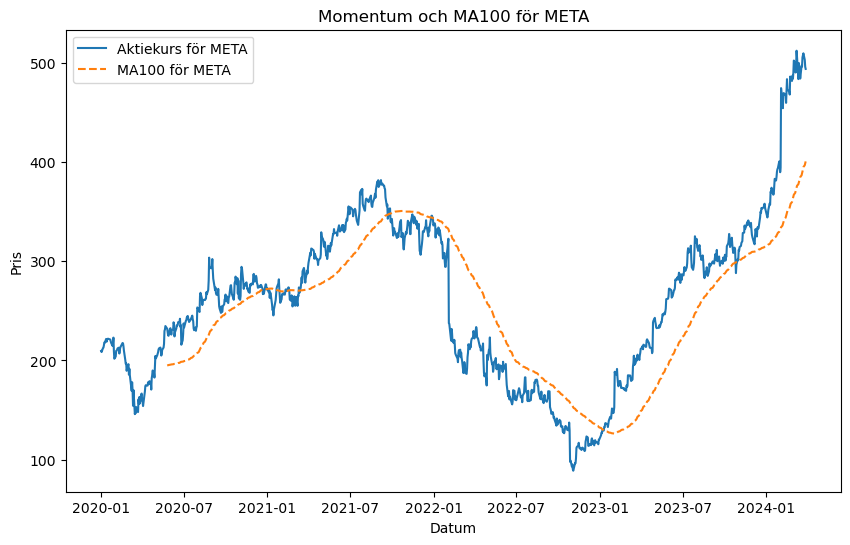

Slutligt kapital: 439793.4932533859


In [24]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Hämta och förbered data
aktier = ['AAPL', 'MSFT', 'GOOG','META','RIOT','MARA','SYM','PLTR','IBIO','MPW','BLNK','FSLR','OUST','DKNG','GEVO','NCNO']
data = yf.download(aktier, start='2020-01-01')['Adj Close']

# Beräkna momentum och MA100
# Beräkna momentum och MA100
for aktie in aktier:
    momentum = data[aktie].pct_change(30) * 0.40 + data[aktie].pct_change(90) * 0.25 + data[aktie].pct_change(180) * 0.20 + data[aktie].pct_change(365) * 0.15
    momentum_scores[aktie] = momentum
    data[aktie + '_MA100'] = data[aktie].rolling(window=100).mean()

# Skapa en tom DataFrame för de filtrerade momentumskårerna
filtered_momentum_scores = pd.DataFrame(index=momentum_scores.index)

# Applicera MA100-filtret för varje aktie och uppdatera de filtrerade momentumskårerna
for aktie in aktier:
    # Skapa en mask som är True när aktiens pris är större än dess MA100
    mask = data[aktie].iloc[-1] > data[aktie + '_MA100'].iloc[-1]
    # Applicera masken på momentumskåren för aktien
    if mask:
        filtered_momentum_scores[aktie] = momentum_scores[aktie]

# Ranka aktier baserat på den senaste filtrerade momentumskåren
ranked_aktier = filtered_momentum_scores.iloc[-1].dropna().sort_values(ascending=False)


# Förbered data för tabellen
resultat_data = {
    'Aktie': ranked_aktier.index,
    'Senaste Pris': [data[aktie].iloc[-1] for aktie in ranked_aktier.index],
    'MA100': [data[aktie + '_MA100'].iloc[-1] for aktie in ranked_aktier.index],
    'Procent över MA100': [(data[aktie].iloc[-1] / data[aktie + '_MA100'].iloc[-1] - 1) * 100 for aktie in ranked_aktier.index],
    'Momentumskår': ranked_aktier.values
}

resultat_tabell = pd.DataFrame(resultat_data)

# Använd DataFrame.style för att förbättra tabellpresentationen
styled_resultat_tabell = resultat_tabell.style.set_table_styles(
    [{'selector': 'th', 'props': [('background-color', '#f4f4f4'), ('color', 'black')]}]
).set_properties(**{
    'background-color': '#f9f9f9', 
    'color': 'black', 
    'border-color': 'black'
}).set_caption("Topprankade Aktier baserat på Momentumstrategin")

# Visualisering för de topprankade aktierna
top_aktie = ranked_aktier.index[0]
plt.figure(figsize=(10, 6))
plt.plot(data[top_aktie], label=f'Aktiekurs för {top_aktie}')
plt.plot(data[top_aktie + '_MA100'], label=f'MA100 för {top_aktie}', linestyle='--')
plt.title(f'Momentum och MA100 för {top_aktie}')
plt.xlabel('Datum')
plt.ylabel('Pris')
plt.legend()
plt.show()

# Visa den formaterade tabellen
styled_resultat_tabell

# Antag att vi startar med ett kapital
kapital = 100000
kapital_per_aktie = kapital / len(aktier)

# Dictionary för att hålla koll på köpta aktier
köpta_aktier = {}

# Genomgå varje dag i datamängden
for i in range(100, len(data)):  # Startar från dag 100 för att MA100 ska vara tillgänglig
    dagens_data = data.iloc[i]
    for aktie in aktier:
        # Köplogik: Aktiens pris är över MA100 och momentum är positivt
        if dagens_data[aktie] > dagens_data[aktie + '_MA100'] and momentum_scores.iloc[i][aktie] > 0:
            antal_aktier = kapital_per_aktie / dagens_data[aktie]
            köpta_aktier[aktie] = (antal_aktier, dagens_data[aktie])  # Antal aktier och köppris
        # Försäljningslogik eller stop-loss (exempel)
        elif aktie in köpta_aktier:
            köp_antal, köp_pris = köpta_aktier[aktie]
            nuvarande_pris = dagens_data[aktie]
            if nuvarande_pris < köp_pris * 0.85:  # Stop-loss vid 15% förlust
                kapital += köp_antal * nuvarande_pris  # "Sälj" aktien
                del köpta_aktier[aktie]

# Uppdatera det slutliga kapitalet baserat på värdet av de kvarvarande aktierna
for aktie, (antal_aktier, _) in köpta_aktier.items():
    kapital += antal_aktier * data.iloc[-1][aktie]

print(f"Slutligt kapital: {kapital}")



[*********************100%%**********************]  16 of 16 completed


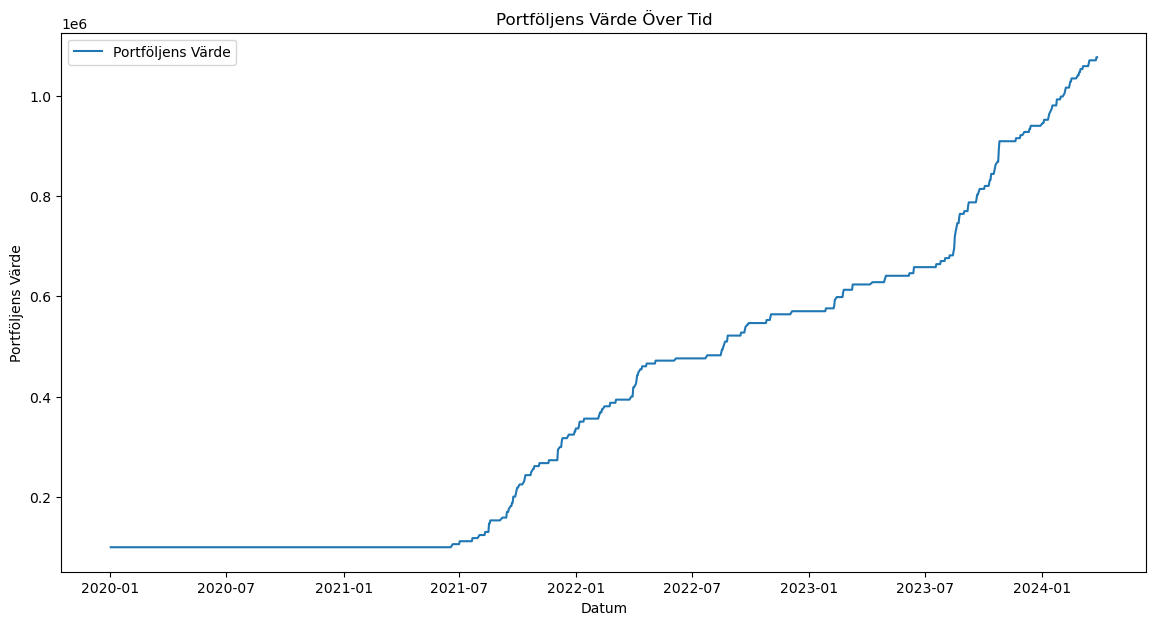

In [25]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Hämta och förbered data
aktier = ['AAPL', 'MSFT', 'GOOG', 'META', 'RIOT', 'MARA', 'SYM', 'PLTR', 'IBIO', 'MPW', 'BLNK', 'FSLR', 'OUST', 'DKNG', 'GEVO', 'NCNO']
data = yf.download(aktier, start='2020-01-01')['Adj Close']

# Initialisera DataFrame för momentum och MA100
momentum_scores = pd.DataFrame(index=data.index)
for aktie in aktier:
    momentum = data[aktie].pct_change(30) * 0.40 + data[aktie].pct_change(90) * 0.25 + data[aktie].pct_change(180) * 0.20 + data[aktie].pct_change(365) * 0.15
    momentum_scores[aktie] = momentum
    data[aktie + '_MA100'] = data[aktie].rolling(window=100).mean()

# Initiera portföljens värde och köpta aktier
kapital_start = 100000
portfölj_värde = pd.Series(kapital_start, index=data.index)
köpta_aktier = dict.fromkeys(aktier, 0)

# Backtesting genom att iterera över varje dag
for i in range(len(data)):
    dagens_data = data.iloc[i]
    for aktie in aktier:
        if dagens_data[aktie] > dagens_data[aktie + '_MA100'] and momentum_scores.iloc[i][aktie] > 0 and köpta_aktier[aktie] == 0:
            # Köplogik: Allokera lika kapital till varje aktie
            köpta_aktier[aktie] = kapital_start / len(aktier) / dagens_data[aktie]
        elif dagens_data[aktie] < dagens_data[aktie + '_MA100'] and köpta_aktier[aktie] > 0:
            # Säljlogik: Sälj om aktiens pris faller under MA100
            portfölj_värde[i:] += köpta_aktier[aktie] * dagens_data[aktie]  # Uppdatera portföljvärdet
            köpta_aktier[aktie] = 0

# Visualisera portföljens värde över tid
plt.figure(figsize=(14, 7))
plt.plot(portfölj_värde, label='Portföljens Värde')
plt.title('Portföljens Värde Över Tid')
plt.xlabel('Datum')
plt.ylabel('Portföljens Värde')
plt.legend()
plt.show()



[*********************100%%**********************]  15 of 15 completed
Empty DataFrame
Columns: [Datum, Aktie, Typ, Pris]
Index: []


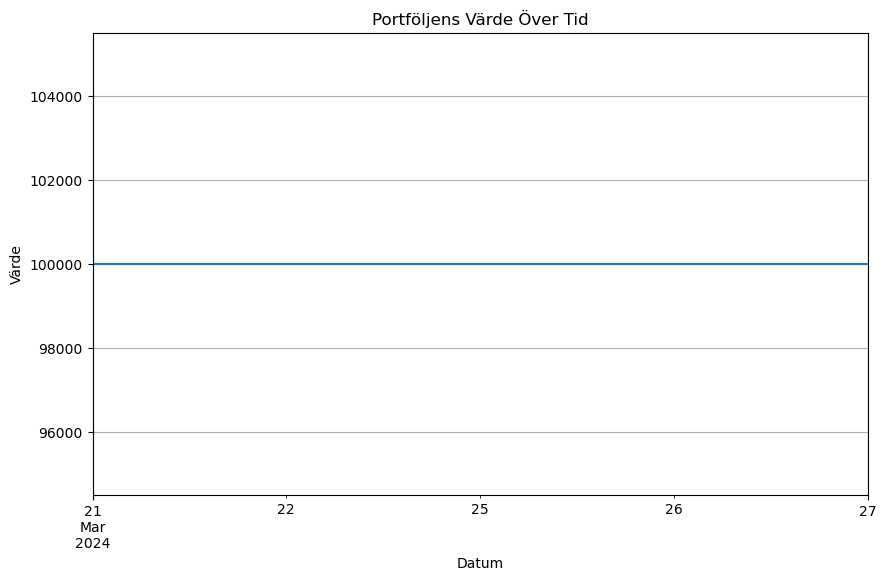

In [34]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Hämta och förbered data
aktier = ['AAPL', 'MSFT', 'GOOG', 'META', 'RIOT', 'MARA', 'PLTR', 'IBIO', 'MPW', 'BLNK', 'FSLR', 'OUST', 'DKNG', 'GEVO', 'NCNO']
data = yf.download(aktier, start='2024-03-21')['Adj Close']

# Beräkna momentum och MA100
momentum_scores = pd.DataFrame(index=data.index)
for aktie in aktier:
    momentum = data[aktie].pct_change(30) * 0.40 + data[aktie].pct_change(90) * 0.25 + data[aktie].pct_change(180) * 0.20 + data[aktie].pct_change(365) * 0.15
    momentum_scores[aktie] = momentum
    data[aktie + '_MA100'] = data[aktie].rolling(window=100).mean()

# Transaktionslogg och portföljvärde
transaktionslogg = pd.DataFrame(columns=['Datum', 'Aktie', 'Typ', 'Pris'])
kapital_start = 100000
portfölj_värde = pd.Series(index=data.index, data=kapital_start)

# Handelslogik
for datum, row in data.iterrows():
    for aktie in aktier:
        if row[aktie] > row[aktie + '_MA100'] and momentum_scores.loc[datum, aktie] > 0:
            # Köp om inte redan köpt
            if aktie not in transaktionslogg['Aktie'].values:
                transaktionslogg = transaktionslogg.append({'Datum': datum, 'Aktie': aktie, 'Typ': 'Köp', 'Pris': row[aktie]}, ignore_index=True)
        elif row[aktie] < row[aktie + '_MA100'] and aktie in transaktionslogg['Aktie'].values and not transaktionslogg[(transaktionslogg['Aktie'] == aktie) & (transaktionslogg['Typ'] == 'Sälj')].empty:
            # Sälj om tidigare köpt och inte redan sålt
            transaktionslogg = transaktionslogg.append({'Datum': datum, 'Aktie': aktie, 'Typ': 'Sälj', 'Pris': row[aktie]}, ignore_index=True)

# Visa transaktionsloggen
print(transaktionslogg)

# Visualisera portföljens värde över tid (om nödvändigt)
plt.figure(figsize=(10, 6))
portfölj_värde.plot(title='Portföljens Värde Över Tid')
plt.xlabel('Datum')
plt.ylabel('Värde')
plt.grid(True)
plt.show()


[*********************100%%**********************]  15 of 15 completed
Slutvärde för portföljen: 3372312.45
Total avkastning: 3272.31%
CAGR: 62.70%


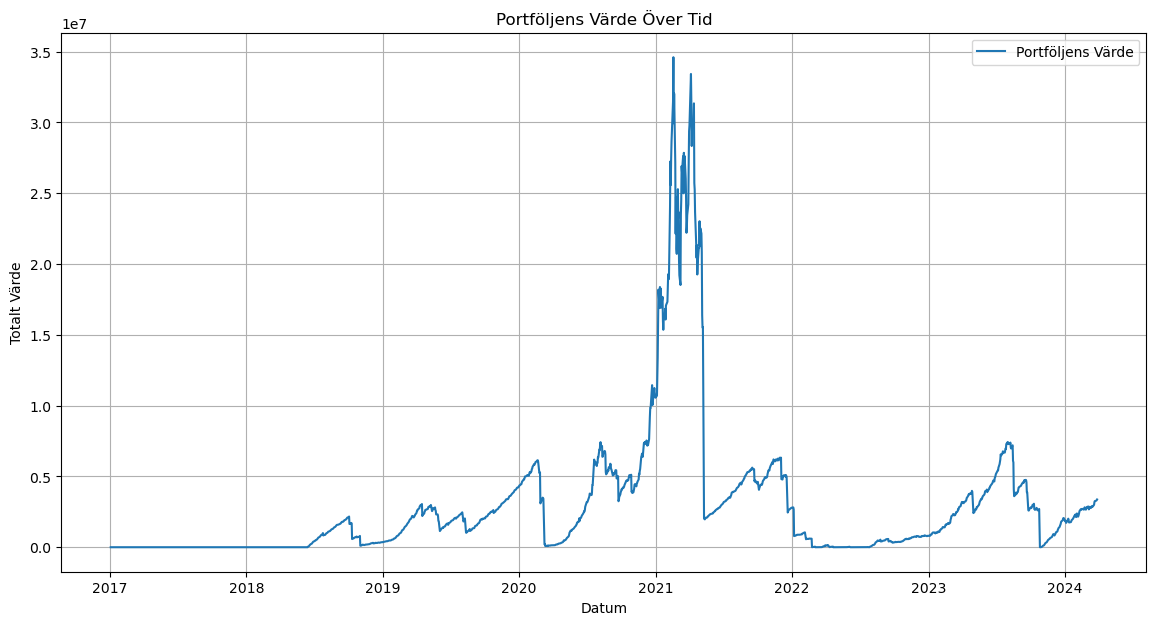

In [33]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Hämta och förbered data
aktier = ['AAPL', 'MSFT', 'GOOG', 'META', 'RIOT', 'MARA', 'PLTR', 'IBIO', 'MPW', 'BLNK', 'FSLR', 'OUST', 'DKNG', 'GEVO', 'NCNO']
data = yf.download(aktier, start='2017-01-01')['Adj Close']

# Beräkna momentum och MA100
momentum_scores = pd.DataFrame(index=data.index)
for aktie in aktier:
    momentum = data[aktie].pct_change(30) * 0.40 + data[aktie].pct_change(90) * 0.25 + data[aktie].pct_change(180) * 0.20 + data[aktie].pct_change(365) * 0.15
    momentum_scores[aktie] = momentum
    data[aktie + '_MA100'] = data[aktie].rolling(window=100).mean()

# Transaktionslogg och portföljvärde
# Initialisera en DataFrame för att hålla koll på portföljens innehav
portfölj = pd.DataFrame(0, index=data.index, columns=aktier)

# Initiera en serie för att hålla koll på portföljens totala värde över tiden
portfölj_värde = pd.Series(index=data.index, data=np.nan)

# Kapitalallokering per aktie vid köp
kapital_per_aktie = kapital_start / len(aktier)

for datum in data.index:
    for aktie in aktier:
        # Köplogik: Om aktiens pris är över MA100 och momentum är positivt
        if data.loc[datum, aktie] > data.loc[datum, aktie + '_MA100'] and momentum_scores.loc[datum, aktie] > 0:
            # Anta att vi allokera en lika del av startkapitalet till varje köp
            portfölj.loc[datum:, aktie] += kapital_per_aktie / data.loc[datum, aktie]  # Antal aktier köpta
        
        # Säljlogik: Om aktiens pris faller under MA100
        elif data.loc[datum, aktie] < data.loc[datum, aktie + '_MA100']:
            portfölj.loc[datum:, aktie] = 0  # Sälj alla aktier av denna typ

    # Beräkna portföljens värde vid slutet av dagen
    dagens_värden = portfölj.loc[datum] * data.loc[datum]
    portfölj_värde[datum] = dagens_värden.sum()

# Fyll eventuella NaN-värden med det senaste giltiga värdet
portfölj_värde = portfölj_värde.ffill()

# Beräkna slutvärde för portföljen
slutvärde = portfölj_värde.iloc[-1]

# Beräkna den totala avkastningen
total_avkastning = (slutvärde / kapital_start - 1) * 100  # i procent

# Beräkna antal år som simuleringen täcker
startdatum = portfölj_värde.index[0]
slutdatum = portfölj_värde.index[-1]
antaldagar = (slutdatum - startdatum).days
antalår = antaldagar / 365.25  # Tar hänsyn till skottår

# Beräkna CAGR
cagr = ((slutvärde / kapital_start) ** (1 / antalår) - 1) * 100  # i procent

# Skriv ut resultat
print(f"Slutvärde för portföljen: {slutvärde:.2f}")
print(f"Total avkastning: {total_avkastning:.2f}%")
print(f"CAGR: {cagr:.2f}%")



# Visa portföljens värde över tiden
plt.figure(figsize=(14, 7))
plt.plot(portfölj_värde, label='Portföljens Värde')
plt.title('Portföljens Värde Över Tid')
plt.xlabel('Datum')
plt.ylabel('Totalt Värde')
plt.legend()
plt.grid(True)
plt.show()




###### 